# Lead Score By Mushir

> Imoprt The required libraries.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve


## Loading and Understanding Data

In [2]:
df1 = pd.read_csv("Leads.csv")
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df1.shape

(9240, 37)

In [4]:
# Get important information of data using df.info()  
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Understanding the Statistics using df.describe()
df1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Clean Data

 > Checking the percentage of Missing values.

In [6]:
round(100*df1.isnull().sum()/len(df1),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [7]:
# Drop the Columns that have More than 30% Missing values.

In [8]:
df1 = df1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
df1.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,No,No,No,No,No,No,No,Modified


In [9]:
# Now Rechacking Missing values. 
round(100*df1.isnull().sum()/len(df1),2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [10]:
## Fill "None" in Missing Values Columns. 

df1['Country'] = df1['Country'].fillna('None')
df1['Specialization'] = df1['Specialization'].fillna('None')
df1['What is your current occupation'] = df1['What is your current occupation'].fillna('None')
df1['What matters most to you in choosing a course'] = df1['What matters most to you in choosing a course'].fillna('None')

In [11]:
# Now Rechecking Missing values.
round(100*df1.isnull().sum()/len(df1),2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [12]:
# Fill Low  Missing value. 
df1["Lead Source"].fillna(df1["Lead Source"].mode()[0],inplace = True)
df1["Last Activity"].fillna(df1["Last Activity"].mode()[0],inplace = True)
df1["TotalVisits"].fillna(df1["TotalVisits"].median(),inplace = True)
df1["Page Views Per Visit"].fillna(df1["Page Views Per Visit"].median(),inplace = True)

In [13]:
# Checking again Missng values.
round(100*df1.isnull().sum()/len(df1),2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [14]:
# Now df1 dont have any Missing Values.

In [15]:
df1["Country"].value_counts()

Country
India                   6492
None                    2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [16]:
def slots(x):
    if x == "India":
        return "India"
    elif x == "None":
        return "None"
    else:
        return "outside india"
df1["Country"] = df1["Country"].apply(slots)
df1["Country"].value_counts()

Country
India            6492
None             2461
outside india     287
Name: count, dtype: int64

In [17]:
df1 = df1.drop("Prospect ID", axis = 1)

In [18]:
df1.shape

(9240, 26)

In [19]:
df1 = df1.applymap(lambda s:s.lower() if type(s) == str else s)
df1 = df1.replace('select',np.nan)

In [20]:
# Checking if there are columns with one unique value since it won't affect our analysis
df1.nunique()

Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                             3
Specialization                                     19
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

In [21]:
#Dropping unique valued columns
df1= df1.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

# EDA 

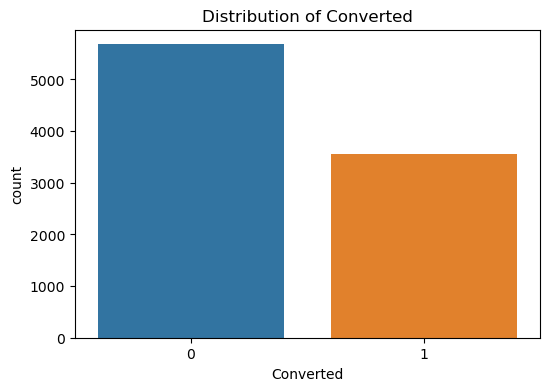

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x = "Converted", data = df1)
plt.title("Distribution of Converted")
plt.show()

###  Categorical Variables

Text(0.5, 1.0, 'A free copy of Mastering The Interview')

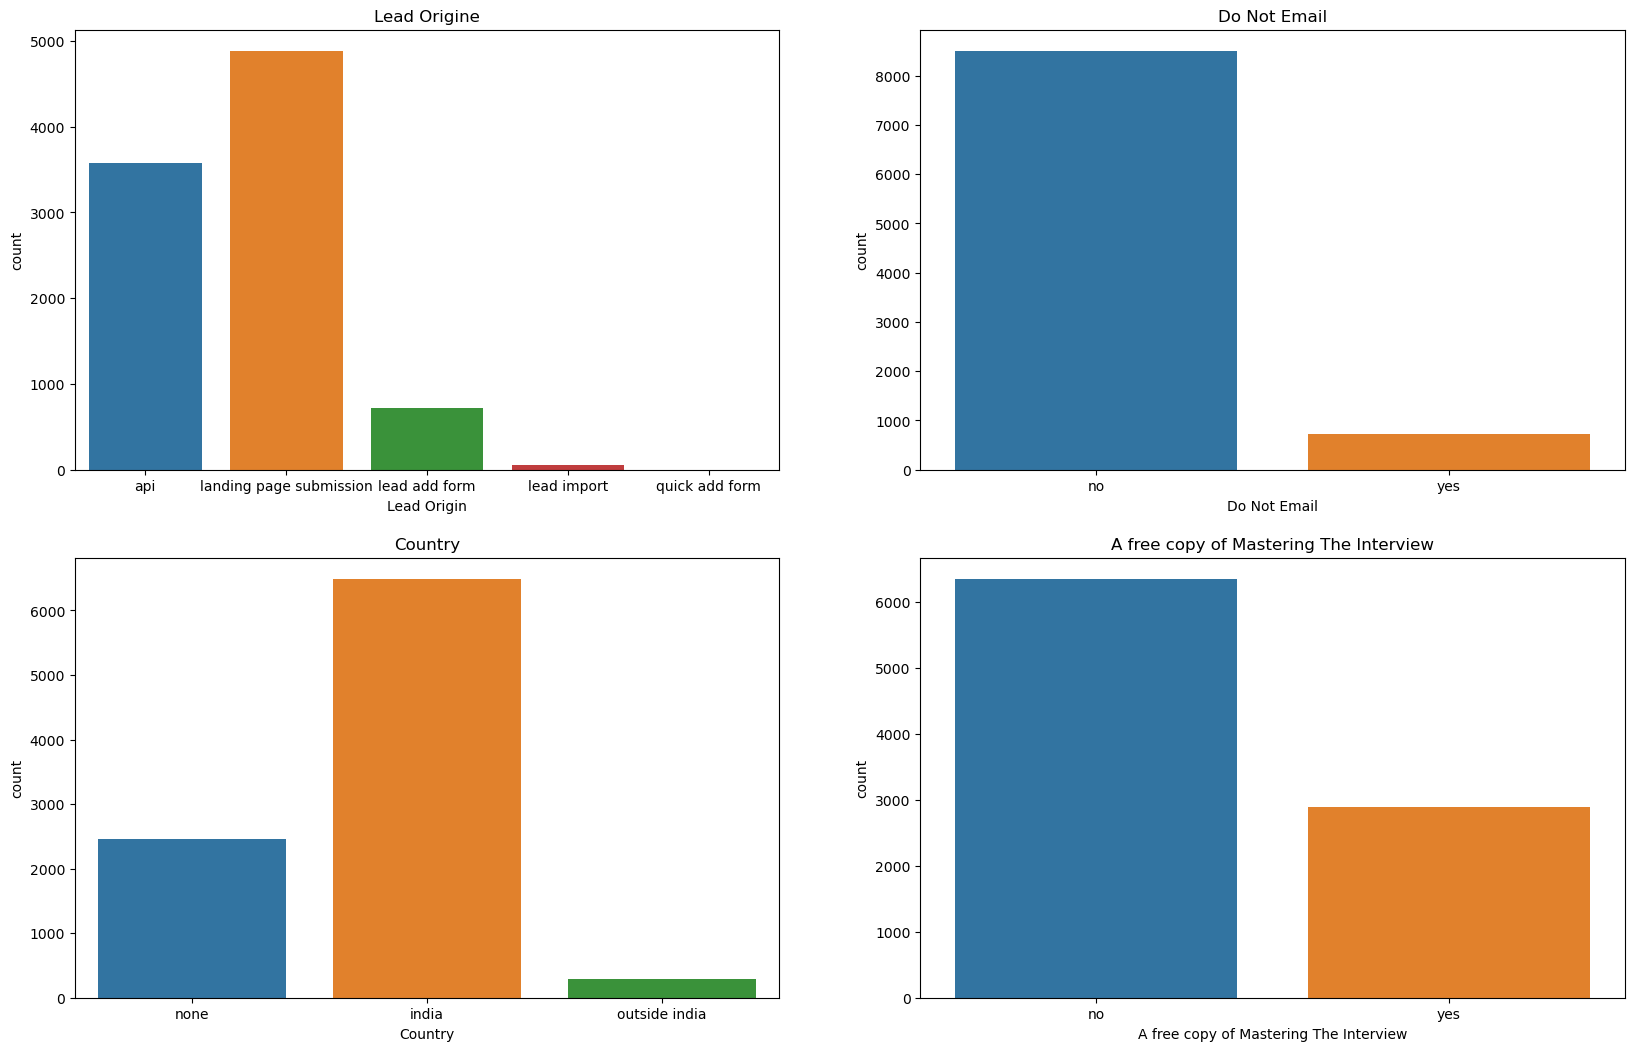

In [23]:
plt.figure(figsize = (20,40))
plt.subplot(6,2,1)
sns.countplot(x = df1["Lead Origin"], data = df1)
plt.title("Lead Origine")

plt.subplot(6,2,2)
sns.countplot(x = df1["Do Not Email"])
plt.title("Do Not Email")

plt.subplot(6,2,3)
sns.countplot(x = df1["Country"])
plt.title("Country")

plt.subplot(6,2,4)
sns.countplot(x = df1["A free copy of Mastering The Interview"])
plt.title("A free copy of Mastering The Interview")


Text(0.5, 1.0, 'Current Occupation')

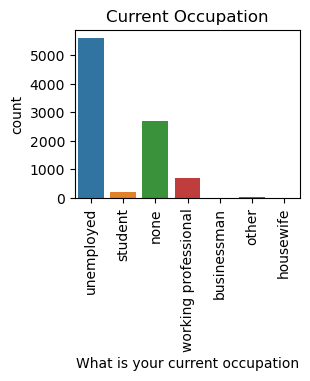

In [24]:
plt.subplot(2,2,2)
sns.countplot(x = df1['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')

### Numerical Veriabels

Text(0.5, 1.0, 'Page Views Per Visit')

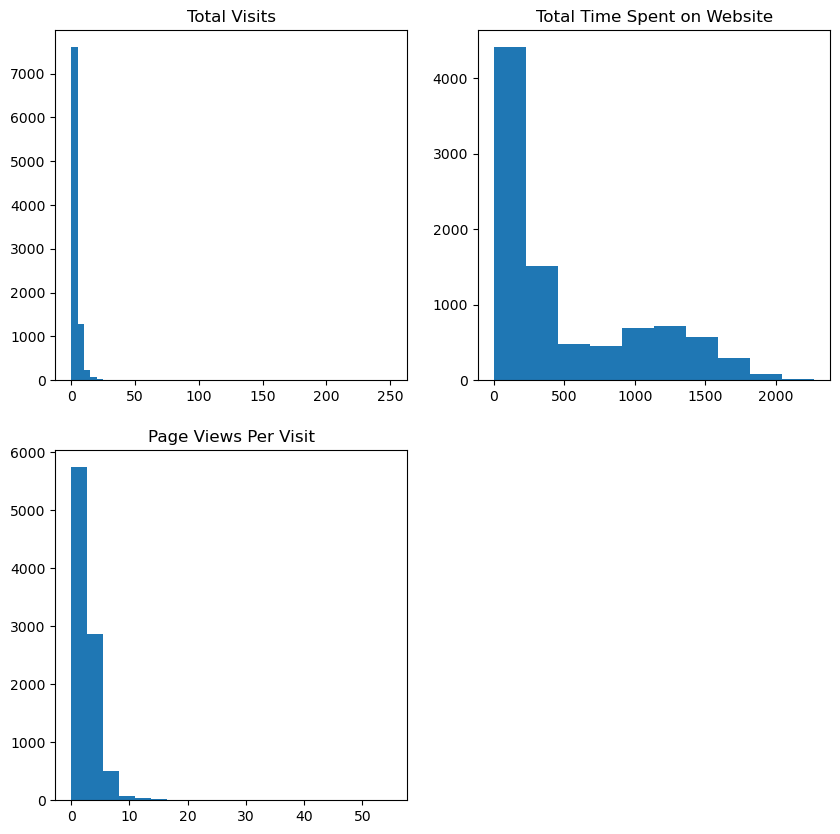

In [25]:
plt.figure(figsize = (10,10))


plt.subplot(221)
plt.hist(x = df1["TotalVisits"], bins = 50)
plt.title("Total Visits")

plt.subplot(222)
plt.hist(x = df1["Total Time Spent on Website"], bins = 10)
plt.title("Total Time Spent on Website")

plt.subplot(223)
plt.hist(x = df1["Page Views Per Visit"], bins = 20)
plt.title("Page Views Per Visit")

### Categorical vs Converted

Text(0.5, 1.0, 'Lead Source')

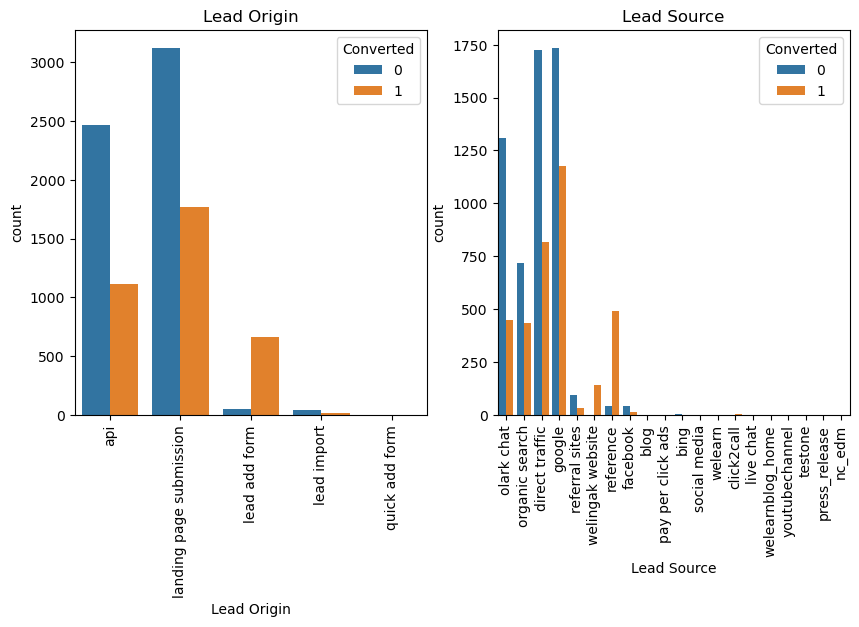

In [26]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot( x = "Lead Origin", hue = "Converted", data = df1).tick_params(axis='x', rotation = 90)
plt.title("Lead Origin")

plt.subplot(1,2,2)
sns.countplot( x = "Lead Source", hue = "Converted", data = df1).tick_params(axis='x', rotation = 90)
plt.title("Lead Source")

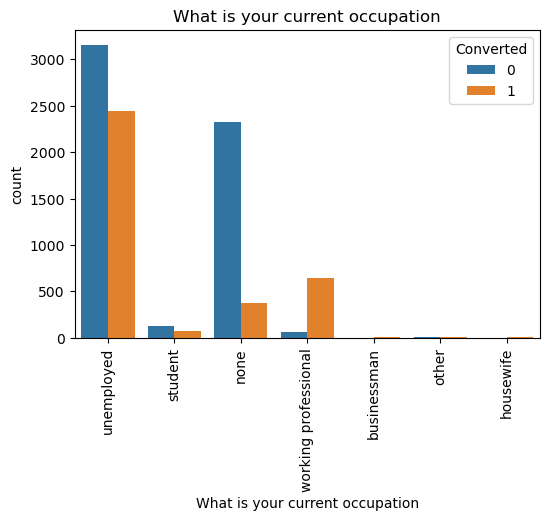

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x='What is your current occupation', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

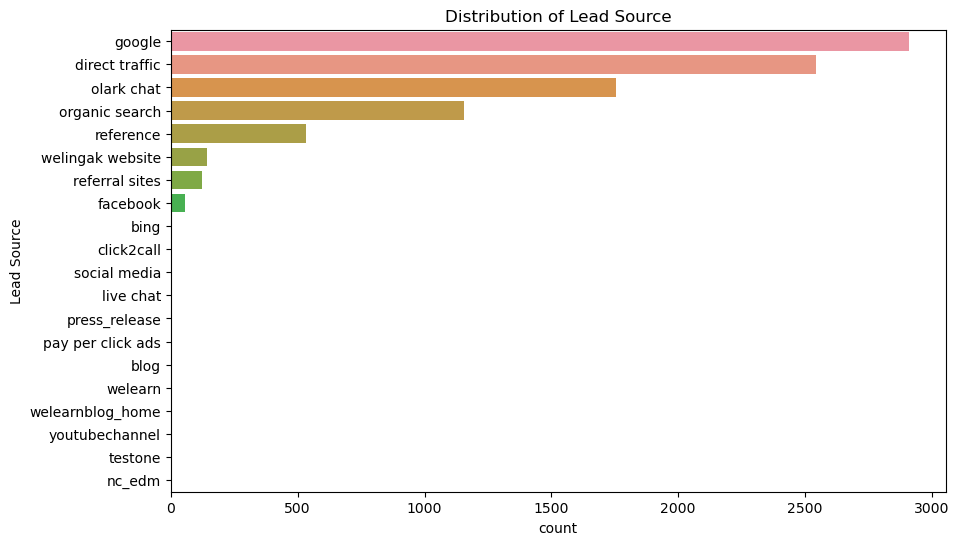

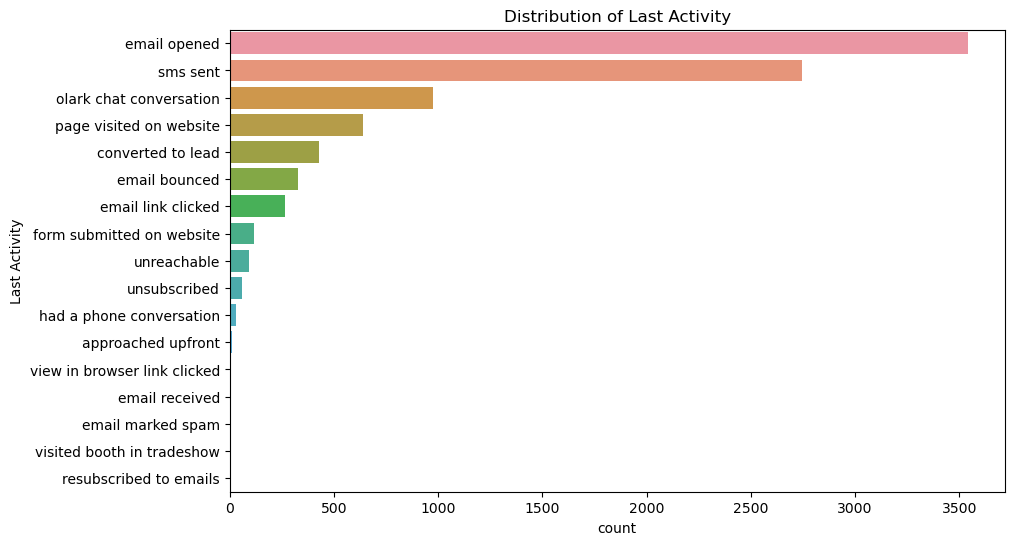

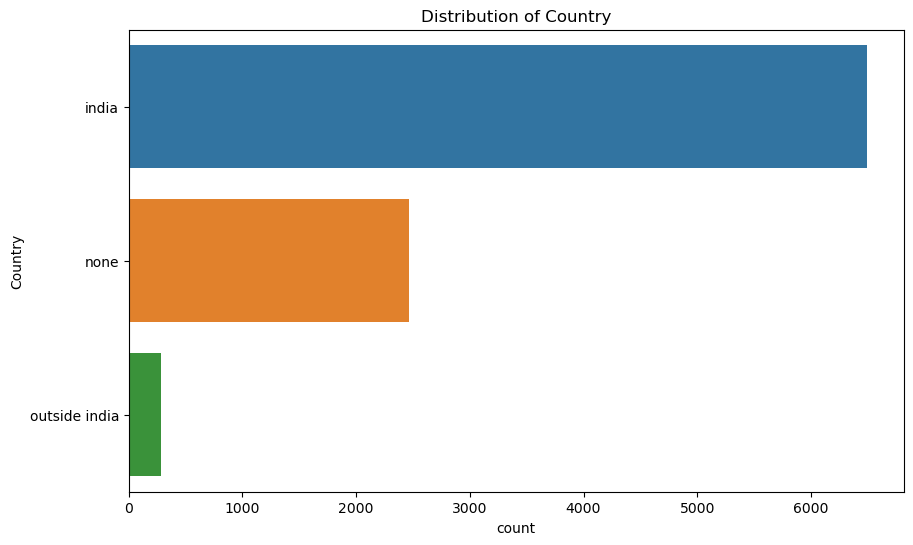

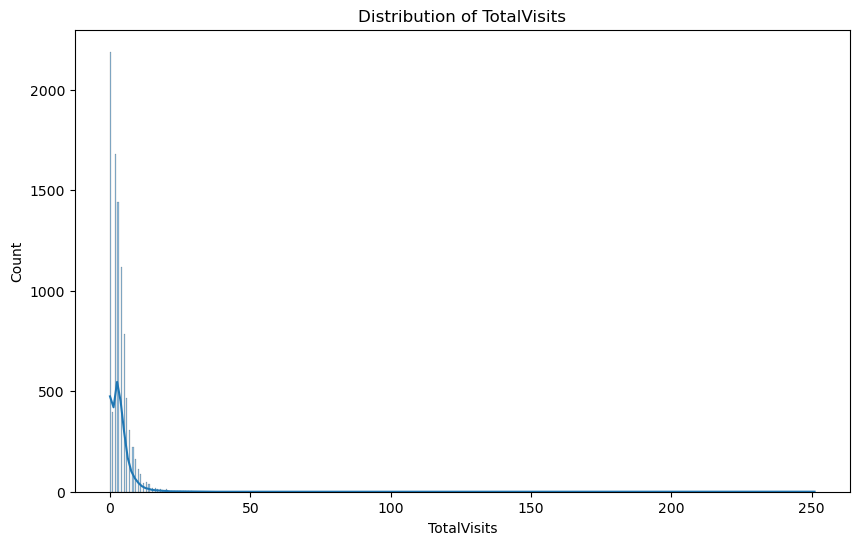

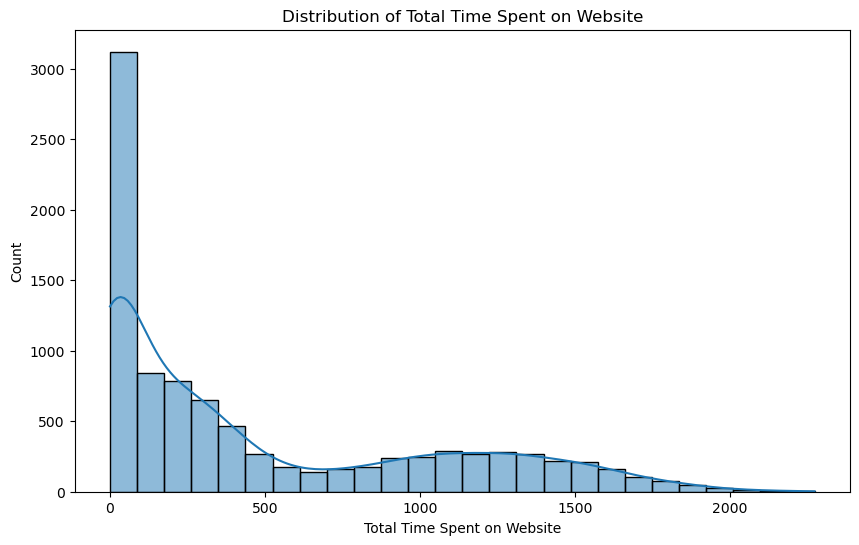

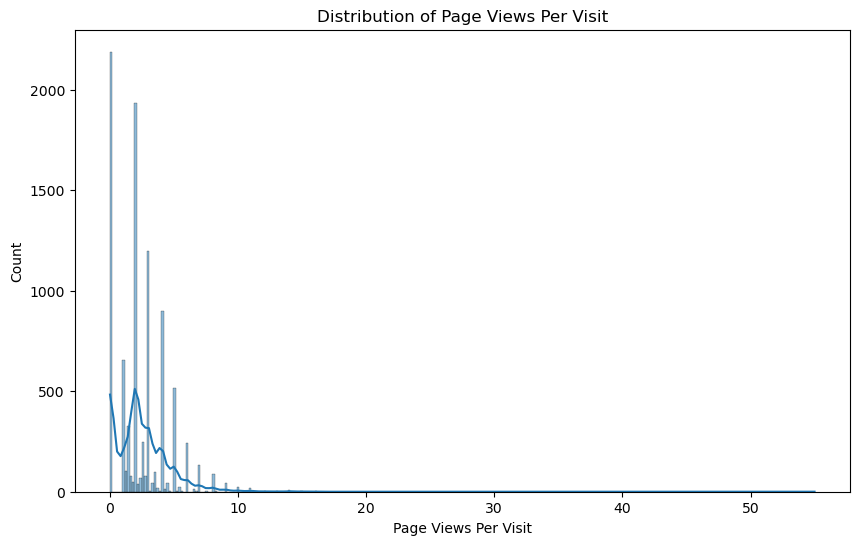

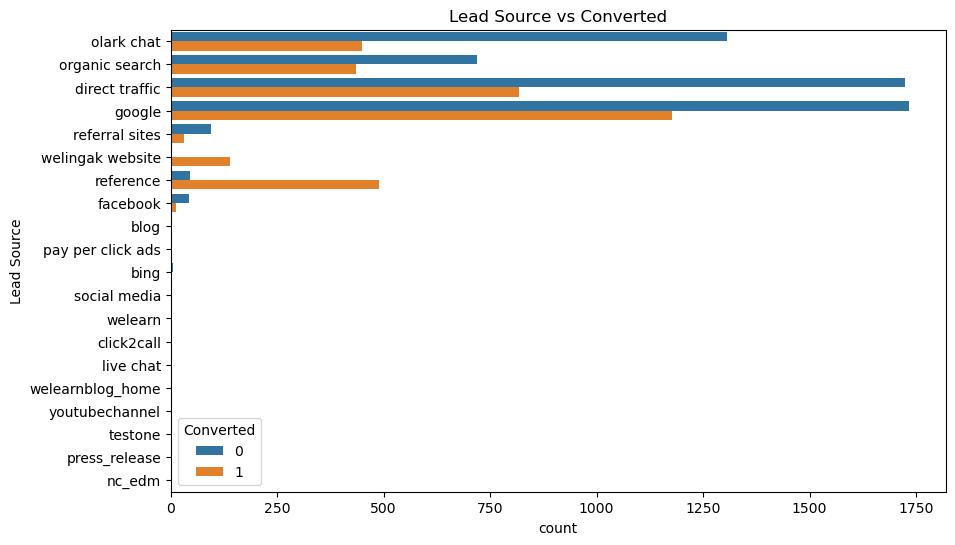

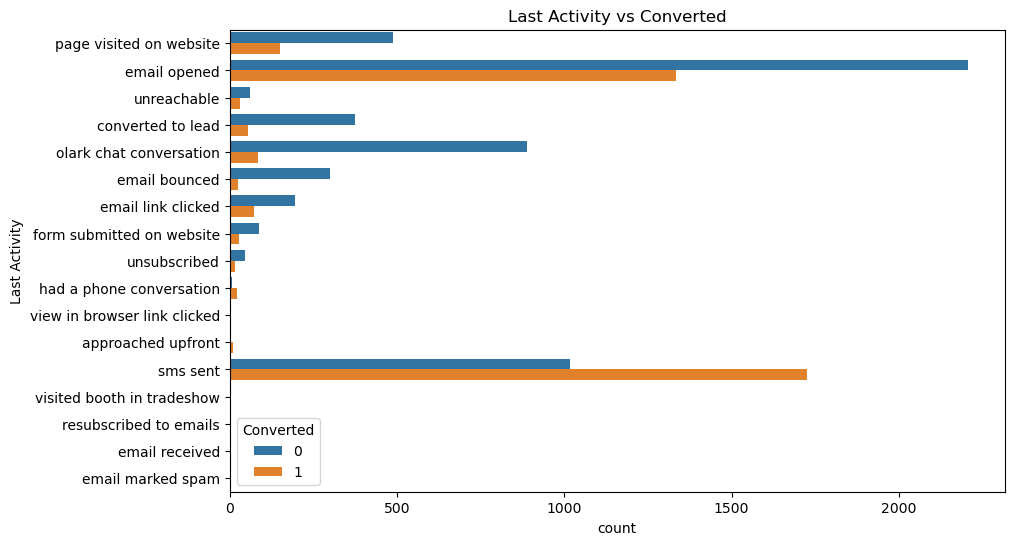

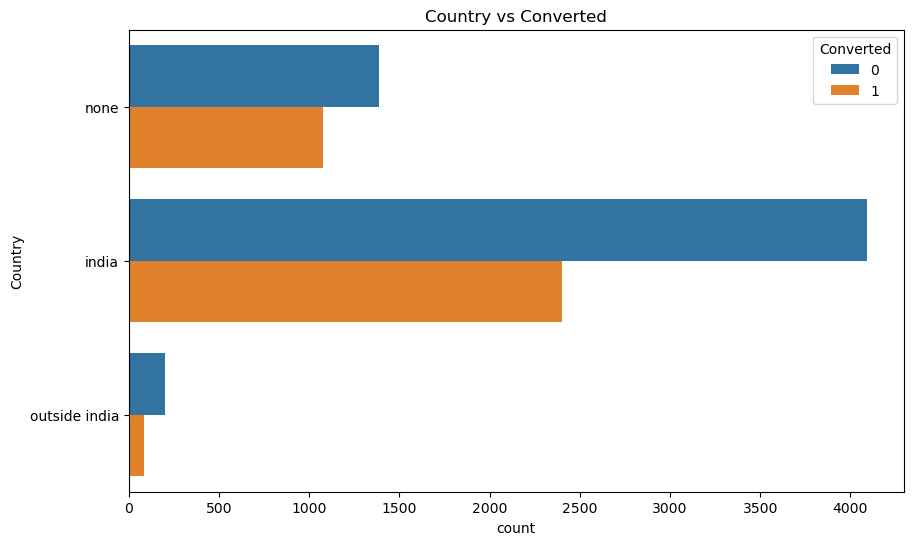

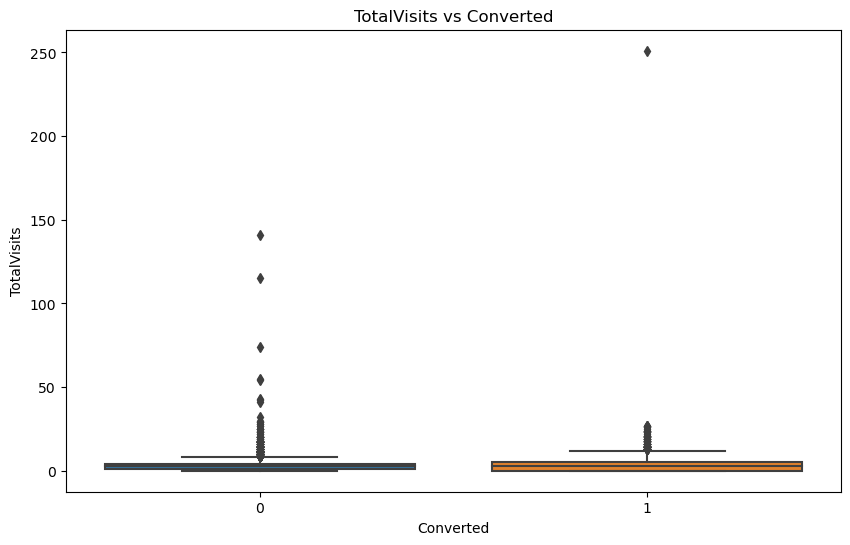

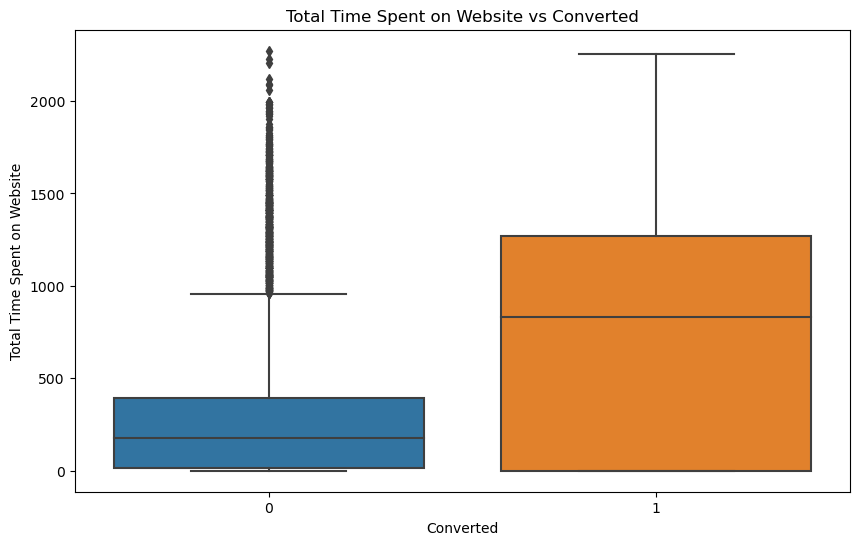

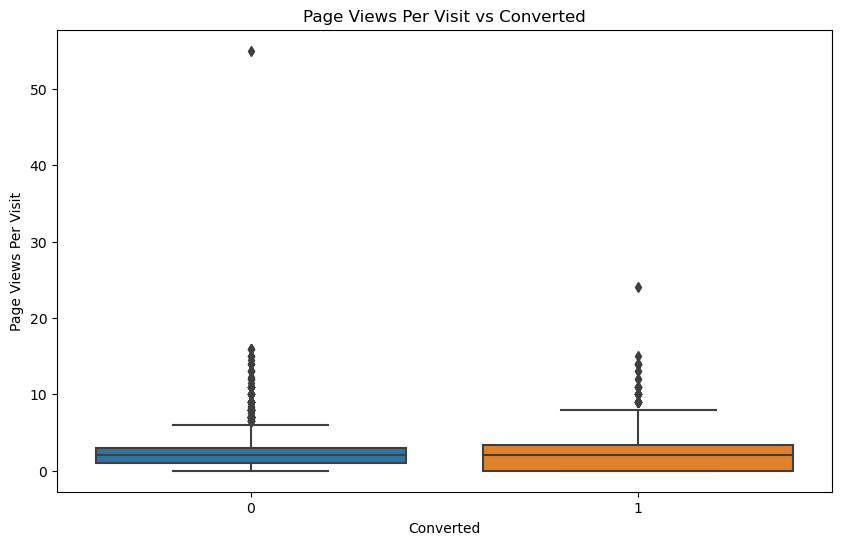

In [28]:
leads_df=df1
#Univariate Analysis for Categorical Variables
categorical_cols = ['Lead Source', 'Last Activity', 'Country']  # Add more categorical columns as needed

for col in categorical_cols:
    plt.figure(figsize=(10,6))
    sns.countplot(y=col, data=leads_df, order=leads_df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

# Univariate Analysis for Numerical Variables
numerical_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']  # Add more numerical columns as needed

for col in numerical_cols:
    plt.figure(figsize=(10,6))
    sns.histplot(leads_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Bivariate Analysis for Categorical Variables vs Target
for col in categorical_cols:
    plt.figure(figsize=(10,6))
    sns.countplot(y=col, hue='Converted', data=leads_df)
    plt.title(f'{col} vs Converted')
    plt.show()

# Bivariate Analysis for Numerical Variables vs Target
for col in numerical_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Converted', y=col, data=leads_df)
    plt.title(f'{col} vs Converted')
    plt.show()

Text(0.5, 1.0, 'Correlation Metrix')

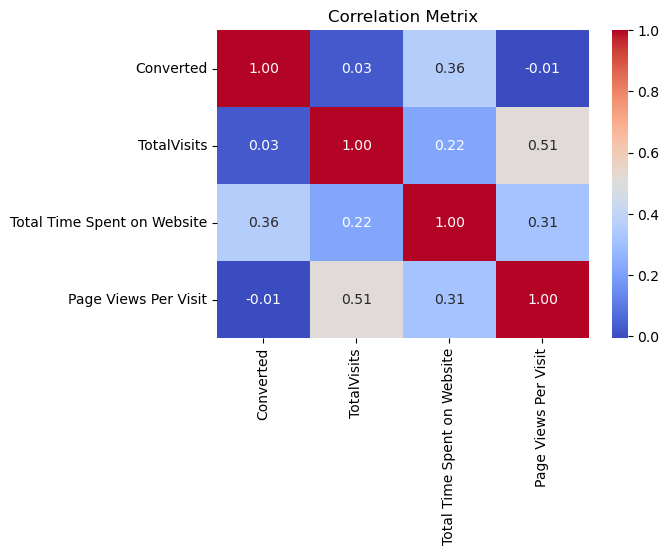

In [29]:
non_numerical_col = df1.select_dtypes(include=["object"]).columns

# Remove None Numerical Columns

numerical_df = df1.drop(columns = non_numerical_col)
Corr_metrix = numerical_df.corr()

# Now Ploting Correlation Metrix PLot

plt.figure(figsize= (6,4))
sns.heatmap(Corr_metrix,annot = True , cmap ="coolwarm",fmt=".2f")
plt.title("Correlation Metrix")

## Dummy Variables

In [30]:
df1.loc[:, df1.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [31]:
dum = pd.get_dummies(df1[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

df1_dum = pd.concat([df1, dum], axis=1)
df1_dum.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,none,...,False,False,True,False,False,False,False,False,False,False
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,False,False,False,False,False,False,False,False,False,False
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,False,False,False,False,False,False,False,False,False,False
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,False,False,True,False,False,False,False,False,False,False
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,False,False,True,False,False,False,False,False,False,False


In [32]:
df1_dum = df1_dum.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'],axis = 1)
df1_dum.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Specialization_business administration,Specialization_e-business,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.0,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,5.0,674,2.5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.0,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.0,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,1,2.0,1428,1.0,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


## Test - Train - Split

In [33]:
X = df1_dum.drop(['Converted'], axis= 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,5.0,674,2.5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1532,2.0,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,305,1.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2.0,1428,1.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [34]:
# Take y as target veriable
y = df1_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [35]:
# Take 70% and 30% for train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [36]:
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3112,0.007968,0.182867,0.083333,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
8413,0.019920,0.679538,0.208333,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2961,0.011952,0.553928,0.041667,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24,0.023904,0.504660,0.062500,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2740,0.011952,0.445184,0.125000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Model Building


In [37]:
# LogisticRegression
logreg = LogisticRegression()

In [38]:
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit RFE on the training data
rfe = rfe.fit(X_train, y_train)

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_landing page submission', False, 14),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 66),
 ('Lead Origin_quick add form', False, 67),
 ('Specialization_business administration', False, 37),
 ('Specialization_e-business', False, 25),
 ('Specialization_e-commerce', False, 35),
 ('Specialization_finance management', False, 31),
 ('Specialization_healthcare management', False, 24),
 ('Specialization_hospitality management', False, 47),
 ('Specialization_human resource management', False, 29),
 ('Specialization_international business', False, 43),
 ('Specialization_it projects management', False, 30),
 ('Specialization_marketing management', False, 28),
 ('Specialization_media and advertising', False, 44),
 ('Specialization_none', False, 15),
 ('Specialization_operations management', False, 32),
 ('Specialization_retail management', False, 60

In [40]:
# put the all the columns in "col"
col = X_train.columns[rfe.support_]

In [41]:
# Select Columns By rfe
X_train = X_train[col]

In [42]:
X_train_sm = sm.add_constant(X_train)


In [43]:
logm1 = sm.GLM(y_train, X_train_sm.astype(float), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2634.1
Date:                Fri, 28 Jun 2024   Deviance:                       5268.2
Time:                        20:35:21   Pearson chi2:                 6.80e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4066
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1266      0.097    -21.898      0.000      -2.317      -1.936
TotalVisits                                              9.5470      2.591      3.685      0.000       4.469      14.625
Total Time Spent on Website                              4.5834      0.166     27.625      0.000       4.258       4.909
Page Views Per Visit                                    -1.6697      0.569     -2.934      0.003      -2.785      -0.554
Lead Origin_lead add form                                3.4980      0.205     17.060      0.000       3.096       3.900
Lead Source_olark chat                                   1.3117      0.121     10.867      0.000       1.075       1.548
Lead Source_welingak website                             2.4437      1.029      2.375      0.018       0.427       4.460
Do Not Email_yes                                        -1.5269      0.167     -9.159      0.000      -1.854      -1.200
Last Activity_olark chat conversation                   -1.1463      0.159     -7.204      0.000      -1.458      -0.834
Last Activity_sms sent                                   1.3927      0.075     18.556      0.000       1.246       1.540
What is your current occupation_housewife               22.2190   1.89e+04      0.001      0.999   -3.71e+04    3.72e+04
What is your current occupation_none                    -1.2981      0.088    -14.769      0.000      -1.470      -1.126
What is your current occupation_working professional     2.4990      0.182     13.698      0.000       2.141       2.857
Last Notable Activity_had a phone conversation           3.2493      1.171      2.776      0.006       0.955       5.544
Last Notable Activity_resubscribed to emails            24.6791   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Notable Activity_unreachable                        2.6417      0.692      3.815      0.000       1.285       3.999
========================================================================================================================
"""

In [44]:
vif = pd.DataFrame()
vif['Features'] = X_train.astype(float).columns
vif['VIF'] = [variance_inflation_factor(X_train.astype(float).values, i) for i in range(X_train.astype(float).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,2.86
1,Total Time Spent on Website,1.93
0,TotalVisits,1.90
4,Lead Source_olark chat,1.58
10,What is your current occupation_none,1.48
8,Last Activity_sms sent,1.47
7,Last Activity_olark chat conversation,1.41
3,Lead Origin_lead add form,1.40
5,Lead Source_welingak website,1.24
11,What is your current occupation_working profes...,1.20


In [45]:
# Fill NaN values with column means (or use any other appropriate method)
X_train = X_train.fillna(X_train.mean())


In [46]:
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

In [47]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2639.9
Date:                Fri, 28 Jun 2024   Deviance:                       5279.9
Time:                        20:35:22   Pearson chi2:                 6.80e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1171      0.097    -21.838      0.000      -2.307      -1.927
TotalVisits                                              9.7365      2.612      3.728      0.000       4.617      14.856
Total Time Spent on Website                              4.5774      0.166     27.635      0.000       4.253       4.902
Page Views Per Visit                                    -1.6777      0.569     -2.947      0.003      -2.793      -0.562
Lead Origin_lead add form                                3.4918      0.205     17.036      0.000       3.090       3.894
Lead Source_olark chat                                   1.3059      0.121     10.829      0.000       1.070       1.542
Lead Source_welingak website                             2.4443      1.029      2.376      0.017       0.428       4.461
Do Not Email_yes                                        -1.5313      0.167     -9.190      0.000      -1.858      -1.205
Last Activity_olark chat conversation                   -1.1516      0.159     -7.238      0.000      -1.463      -0.840
Last Activity_sms sent                                   1.3846      0.075     18.473      0.000       1.238       1.532
What is your current occupation_housewife               22.2117    1.9e+04      0.001      0.999   -3.71e+04    3.72e+04
What is your current occupation_none                    -1.2992      0.088    -14.794      0.000      -1.471      -1.127
What is your current occupation_working professional     2.4931      0.182     13.672      0.000       2.136       2.850
Last Notable Activity_resubscribed to emails            24.6765   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Notable Activity_unreachable                        2.6326      0.692      3.802      0.000       1.276       3.990
========================================================================================================================
"""

In [48]:
#vVIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.astype(float).columns
vif['VIF'] = [variance_inflation_factor(X_train.astype(float).values, i) for i in range(X_train.astype(float).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,2.86
1,Total Time Spent on Website,1.93
0,TotalVisits,1.90
4,Lead Source_olark chat,1.58
10,What is your current occupation_none,1.48
8,Last Activity_sms sent,1.47
7,Last Activity_olark chat conversation,1.41
3,Lead Origin_lead add form,1.40
5,Lead Source_welingak website,1.24
11,What is your current occupation_working profes...,1.20


In [49]:
# The VIF values seem fine but the p-values aren't. So removing

In [50]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [51]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm.astype(float), family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.6
Date:                Fri, 28 Jun 2024   Deviance:                       5285.2
Time:                        20:35:22   Pearson chi2:                 6.81e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4050
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1132      0.097    -21.817      0.000      -2.303      -1.923
TotalVisits                                              9.6760      2.604      3.716      0.000       4.573      14.779
Total Time Spent on Website                              4.5779      0.166     27.640      0.000       4.253       4.903
Page Views Per Visit                                    -1.6702      0.569     -2.937      0.003      -2.785      -0.555
Lead Origin_lead add form                                3.5047      0.205     17.124      0.000       3.104       3.906
Lead Source_olark chat                                   1.3041      0.121     10.819      0.000       1.068       1.540
Lead Source_welingak website                             2.4293      1.029      2.362      0.018       0.413       4.445
Do Not Email_yes                                        -1.5341      0.167     -9.205      0.000      -1.861      -1.207
Last Activity_olark chat conversation                   -1.1537      0.159     -7.252      0.000      -1.465      -0.842
Last Activity_sms sent                                   1.3811      0.075     18.433      0.000       1.234       1.528
What is your current occupation_none                    -1.3010      0.088    -14.817      0.000      -1.473      -1.129
What is your current occupation_working professional     2.4899      0.182     13.654      0.000       2.132       2.847
Last Notable Activity_resubscribed to emails            22.6761   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Last Notable Activity_unreachable                        2.6296      0.693      3.797      0.000       1.272       3.987
========================================================================================================================
"""

In [52]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.astype(float).columns
vif['VIF'] = [variance_inflation_factor(X_train.astype(float).values, i) for i in range(X_train.astype(float).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,2.86
1,Total Time Spent on Website,1.92
0,TotalVisits,1.90
4,Lead Source_olark chat,1.58
9,What is your current occupation_none,1.48
8,Last Activity_sms sent,1.47
7,Last Activity_olark chat conversation,1.41
3,Lead Origin_lead add form,1.39
5,Lead Source_welingak website,1.24
10,What is your current occupation_working profes...,1.20


# Creating Prediction

In [53]:
# Predict the probabilities on the train set
y_train_pred = res.predict(X_train_sm.astype(float))
y_train_pred[:10]

3112    0.207822
8413    0.902350
2961    0.981539
24      0.580306
2740    0.458028
489     0.123172
9116    0.639244
4176    0.233199
8537    0.654990
6267    0.126469
dtype: float64

In [54]:
# Reshaping
y_train_pred = y_train_pred
y_train_pred[:10]

3112    0.207822
8413    0.902350
2961    0.981539
24      0.580306
2740    0.458028
489     0.123172
9116    0.639244
4176    0.233199
8537    0.654990
6267    0.126469
dtype: float64

In [55]:
# convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
3112,0,0.207822
8413,1,0.902350
2961,1,0.981539
24,1,0.580306
2740,0,0.458028


In [56]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted
3112,0,0.207822,0
8413,1,0.902350,1
2961,1,0.981539,1
24,1,0.580306,1
2740,0,0.458028,0


# Model Evaluation

In [57]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3493,  461],
       [ 745, 1769]], dtype=int64)

In [58]:
# Predicted     not_churn    churn
# Actual
# not_churn        3403       492
# churn             729      1727

In [59]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.813543599257885

In [60]:
# That's 81% accuracy with is a very good value

In [61]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [62]:
# Calculating the sensitivity
TP/(TP+FN)

0.7036595067621321

In [63]:
# Calculating the specificity
TN/(TN+FP)

0.883409205867476

In [64]:
# We have around 81% accuracy, sensitivity is 70% and specificity is  88%.

# ROC Curve

In [65]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [66]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

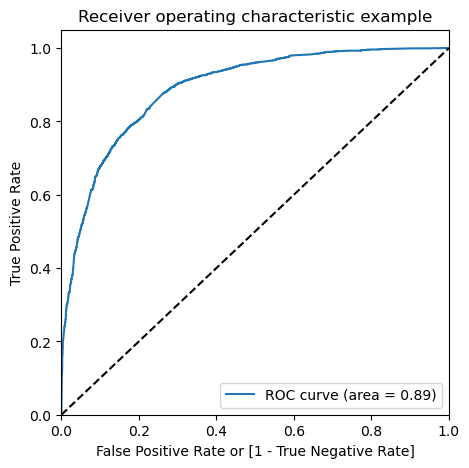

In [67]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [68]:
# ROC curve is 0.89, this is good value

In [69]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3112,0,0.207822,0,1,1,1,0,0,0,0,0,0,0
8413,1,0.902350,1,1,1,1,1,1,1,1,1,1,1
2961,1,0.981539,1,1,1,1,1,1,1,1,1,1,1
24,1,0.580306,1,1,1,1,1,1,1,0,0,0,0
2740,0,0.458028,0,1,1,1,1,1,0,0,0,0,0


In [70]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.388683,1.000000,0.000000
0.1,0.1,0.584416,0.986476,0.328781
0.2,0.2,0.763760,0.914877,0.667678
0.3,0.3,0.789734,0.878679,0.733182
0.4,0.4,0.810142,0.770485,0.835357
0.5,0.5,0.813544,0.703660,0.883409
0.6,0.6,0.806122,0.635243,0.914770
0.7,0.7,0.780612,0.521082,0.945625
0.8,0.8,0.759895,0.433970,0.967122
0.9,0.9,0.715213,0.286794,0.987607


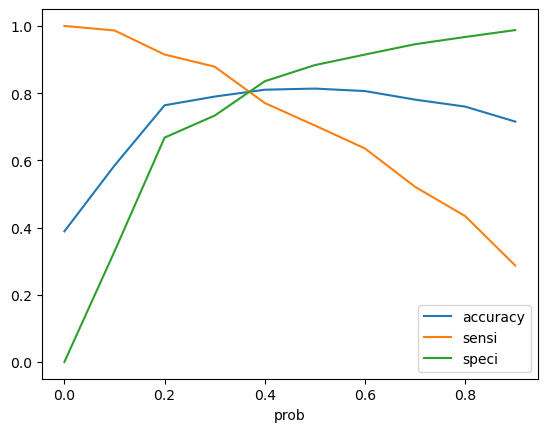

In [71]:
# plot 
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [72]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3112,0,0.207822,0,1,1,1,0,0,0,0,0,0,0,0
8413,1,0.902350,1,1,1,1,1,1,1,1,1,1,1,1
2961,1,0.981539,1,1,1,1,1,1,1,1,1,1,1,1
24,1,0.580306,1,1,1,1,1,1,1,0,0,0,0,1
2740,0,0.458028,0,1,1,1,1,1,0,0,0,0,0,1


In [73]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.803030303030303

In [74]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3183,  771],
       [ 503, 2011]], dtype=int64)

In [75]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [76]:
# Calculating the sensitivity
TP/(TP+FN)

0.799920445505171

In [77]:
# Calculating the specificity
TN/(TN+FP)

0.8050075872534143

In [78]:
# sensitivity and specificity is 80%.

# Prediction on Test set

In [79]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [80]:
# Substituting all the columns in the final train model
col = X_train.columns

In [81]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Do Not Email_yes,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_none,What is your current occupation_working professional,Last Notable Activity_resubscribed to emails,Last Notable Activity_unreachable
567,1.0,0.015936,0.147359,0.166667,False,False,False,False,False,False,False,False,False,False
2303,1.0,0.007968,0.688859,0.083333,False,False,False,False,False,False,False,False,False,False
1523,1.0,0.011952,0.596538,0.125000,False,False,False,False,False,False,False,False,False,False
6923,1.0,0.019920,0.083000,0.208333,False,False,False,False,False,False,False,False,False,False
7841,1.0,0.007968,0.311585,0.083333,False,False,False,False,False,False,False,False,False,False


In [82]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm.astype(float))
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.173254
1,0,0.726767
2,0,0.628223
3,0,0.131426
4,0,0.321072


In [83]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.173254,0
1,0,0.726767,1
2,0,0.628223,1
3,0,0.131426,0
4,0,0.321072,0


In [84]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8095238095238095

In [85]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1401,  324],
       [ 204,  843]], dtype=int64)

In [86]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [87]:
# Calculating the sensitivity
TP/(TP+FN)

0.8051575931232091

In [88]:
# Calculating the specificity
TN/(TN+FP)

0.8121739130434783

In [89]:
# sensitivity is 80% and specificity is 81%.

# Precision-Recall

In [90]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3493,  461],
       [ 745, 1769]], dtype=int64)

In [91]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7932735426008969

In [92]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7036595067621321

In [93]:
#  we have Precision 79% and Recall around 70%

### Precision and recall tradeoff

In [94]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(3112    0
 8413    1
 2961    1
 24      1
 2740    0
        ..
 4829    0
 7291    1
 1344    1
 7293    0
 1289    1
 Name: Converted, Length: 6468, dtype: int64,
 3112    0
 8413    1
 2961    1
 24      1
 2740    0
        ..
 4829    0
 7291    0
 1344    0
 7293    0
 1289    1
 Name: Predicted, Length: 6468, dtype: int64)

In [95]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

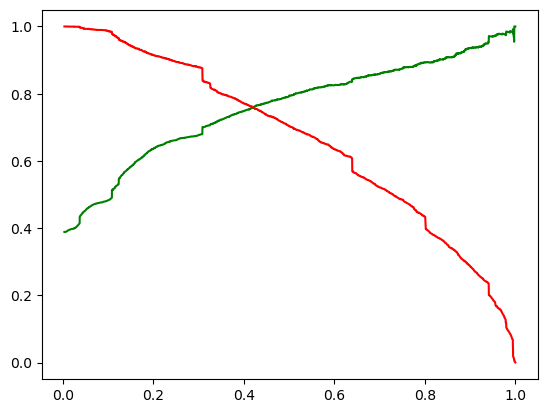

In [96]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [97]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3112,0,0.207822,0,1,1,1,0,0,0,0,0,0,0,0
8413,1,0.902350,1,1,1,1,1,1,1,1,1,1,1,1
2961,1,0.981539,1,1,1,1,1,1,1,1,1,1,1,1
24,1,0.580306,1,1,1,1,1,1,1,0,0,0,0,1
2740,0,0.458028,0,1,1,1,1,1,0,0,0,0,0,1


In [98]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8109152752009895

In [99]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3321,  633],
       [ 590, 1924]], dtype=int64)

In [100]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [101]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7524442706296441

In [102]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7653142402545744

In [103]:
# We have Precision 75% and Recall 76%

# Prediction on Test set

In [104]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm.astype(float))
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.173254
1,0,0.726767
2,0,0.628223
3,0,0.131426
4,0,0.321072


In [105]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.173254,0
1,0,0.726767,1
2,0,0.628223,1
3,0,0.131426,0
4,0,0.321072,0


In [106]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8113275613275613

In [107]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1450,  275],
       [ 248,  799]], dtype=int64)

In [108]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [109]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7439478584729982

In [110]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7631327602674307

In [111]:
# With the current cut off as 0.41 we have Precision around 74% and Recall around 76%